In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('NYC_Bicycle_Counts_2016_Corrected.csv', index_col=0)

data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,,
1-Apr,Friday,78.1,66.0,0.01,"1,704","3,126","4,115","2,552","11,497"
2-Apr,Saturday,55.0,48.9,0.15,827,"1,646","2,565","1,884","6,922"
3-Apr,Sunday,39.9,34.0,0.09,526,"1,232","1,695","1,306","4,759"
4-Apr,Monday,44.1,33.1,0.47 (S),521,"1,067","1,440","1,307","4,335"
5-Apr,Tuesday,42.1,26.1,0,"1,416","2,617","3,081","2,357","9,471"
...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54.0,41.0,1.41,651,"1,558","2,137","1,902","6,248"
28-Oct,Friday,46.9,44.1,0,"2,021","3,872","4,271","3,202","13,366"
29-Oct,Saturday,63.0,39.0,0,"1,639","3,160","4,027","2,920","11,746"


## Is the day of the week affects the number of bikes on the bridge?

In [3]:
#for d in data.Day.unique():
   # data[d] = [1 if day == d else 0 for day in data['Day']]
    
data['Weekend'] = [1 if day in ['Saturday', 'Sunday'] else 0 for day in data['Day']]


In [4]:
data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend
Date,,,,,,,,,,
1-Apr,Friday,78.1,66.0,0.01,"1,704","3,126","4,115","2,552","11,497",0
2-Apr,Saturday,55.0,48.9,0.15,827,"1,646","2,565","1,884","6,922",1
3-Apr,Sunday,39.9,34.0,0.09,526,"1,232","1,695","1,306","4,759",1
4-Apr,Monday,44.1,33.1,0.47 (S),521,"1,067","1,440","1,307","4,335",0
5-Apr,Tuesday,42.1,26.1,0,"1,416","2,617","3,081","2,357","9,471",0
...,...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54.0,41.0,1.41,651,"1,558","2,137","1,902","6,248",0
28-Oct,Friday,46.9,44.1,0,"2,021","3,872","4,271","3,202","13,366",0
29-Oct,Saturday,63.0,39.0,0,"1,639","3,160","4,027","2,920","11,746",1


In [5]:
# 1) reformat the variable for temperature and precipitation
data['Precipitation'] = data['Precipitation'].replace('0.47 (S)', 0.47)
data['Precipitation'] = data['Precipitation'].replace('T', 0)

replace_comma_columns = ['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total']
for col in replace_comma_columns:
    data[col] = data[col].str.replace(',', '')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1-Apr to 31-Oct
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  214 non-null    object 
 1   High Temp (°F)       214 non-null    float64
 2   Low Temp (°F)        214 non-null    float64
 3   Precipitation        214 non-null    object 
 4   Brooklyn Bridge      214 non-null    object 
 5   Manhattan Bridge     214 non-null    object 
 6   Williamsburg Bridge  214 non-null    object 
 7   Queensboro Bridge    214 non-null    object 
 8   Total                214 non-null    object 
 9   Weekend              214 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 18.4+ KB


In [6]:
convert_columns = ['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total', 'Precipitation']
for col in convert_columns:
    data[col] = data[col].astype('float')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1-Apr to 31-Oct
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  214 non-null    object 
 1   High Temp (°F)       214 non-null    float64
 2   Low Temp (°F)        214 non-null    float64
 3   Precipitation        214 non-null    float64
 4   Brooklyn Bridge      214 non-null    float64
 5   Manhattan Bridge     214 non-null    float64
 6   Williamsburg Bridge  214 non-null    float64
 7   Queensboro Bridge    214 non-null    float64
 8   Total                214 non-null    float64
 9   Weekend              214 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 18.4+ KB
None


In [7]:
data['Temp_Diff'] = data['High Temp (°F)'] - data['Low Temp (°F)']

# This dosen't make sense anymore, because data is correct now ! 
# And First half of the bridges has good correlation with dependent values :)
# data['First_half_Bridges'] = data['Brooklyn Bridge'] + data['Manhattan Bridge']
# data['Second_half_Bridges'] = data['Williamsburg Bridge'] + data['Queensboro Bridge']
data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff
Date,,,,,,,,,,,
1-Apr,Friday,78.1,66.0,0.01,1704.0,3126.0,4115.0,2552.0,11497.0,0,12.1
2-Apr,Saturday,55.0,48.9,0.15,827.0,1646.0,2565.0,1884.0,6922.0,1,6.1
3-Apr,Sunday,39.9,34.0,0.09,526.0,1232.0,1695.0,1306.0,4759.0,1,5.9
4-Apr,Monday,44.1,33.1,0.47,521.0,1067.0,1440.0,1307.0,4335.0,0,11.0
5-Apr,Tuesday,42.1,26.1,0.00,1416.0,2617.0,3081.0,2357.0,9471.0,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54.0,41.0,1.41,651.0,1558.0,2137.0,1902.0,6248.0,0,13.0
28-Oct,Friday,46.9,44.1,0.00,2021.0,3872.0,4271.0,3202.0,13366.0,0,2.8
29-Oct,Saturday,63.0,39.0,0.00,1639.0,3160.0,4027.0,2920.0,11746.0,1,24.0


In [8]:
weekday_total_bikes = data.groupby('Day'). sum().Total
weekday_total_bikes

Day
Friday       557522.0
Monday       601205.0
Saturday     465020.0
Sunday       425208.0
Thursday     623439.0
Tuesday      623468.0
Wednesday    672668.0
Name: Total, dtype: float64

In [9]:
weekday_data = pd.DataFrame(weekday_total_bikes)
weekday_data

,Total
Day,
Friday,557522.0
Monday,601205.0
Saturday,465020.0
Sunday,425208.0
Thursday,623439.0
Tuesday,623468.0
Wednesday,672668.0


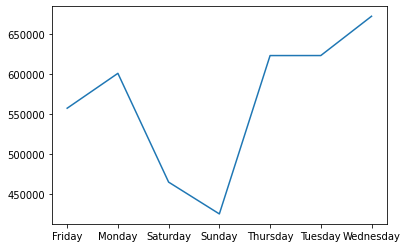

In [10]:
plt.plot(weekday_data)
plt.show()

## What affects the number of bikes on all the bridges and how?

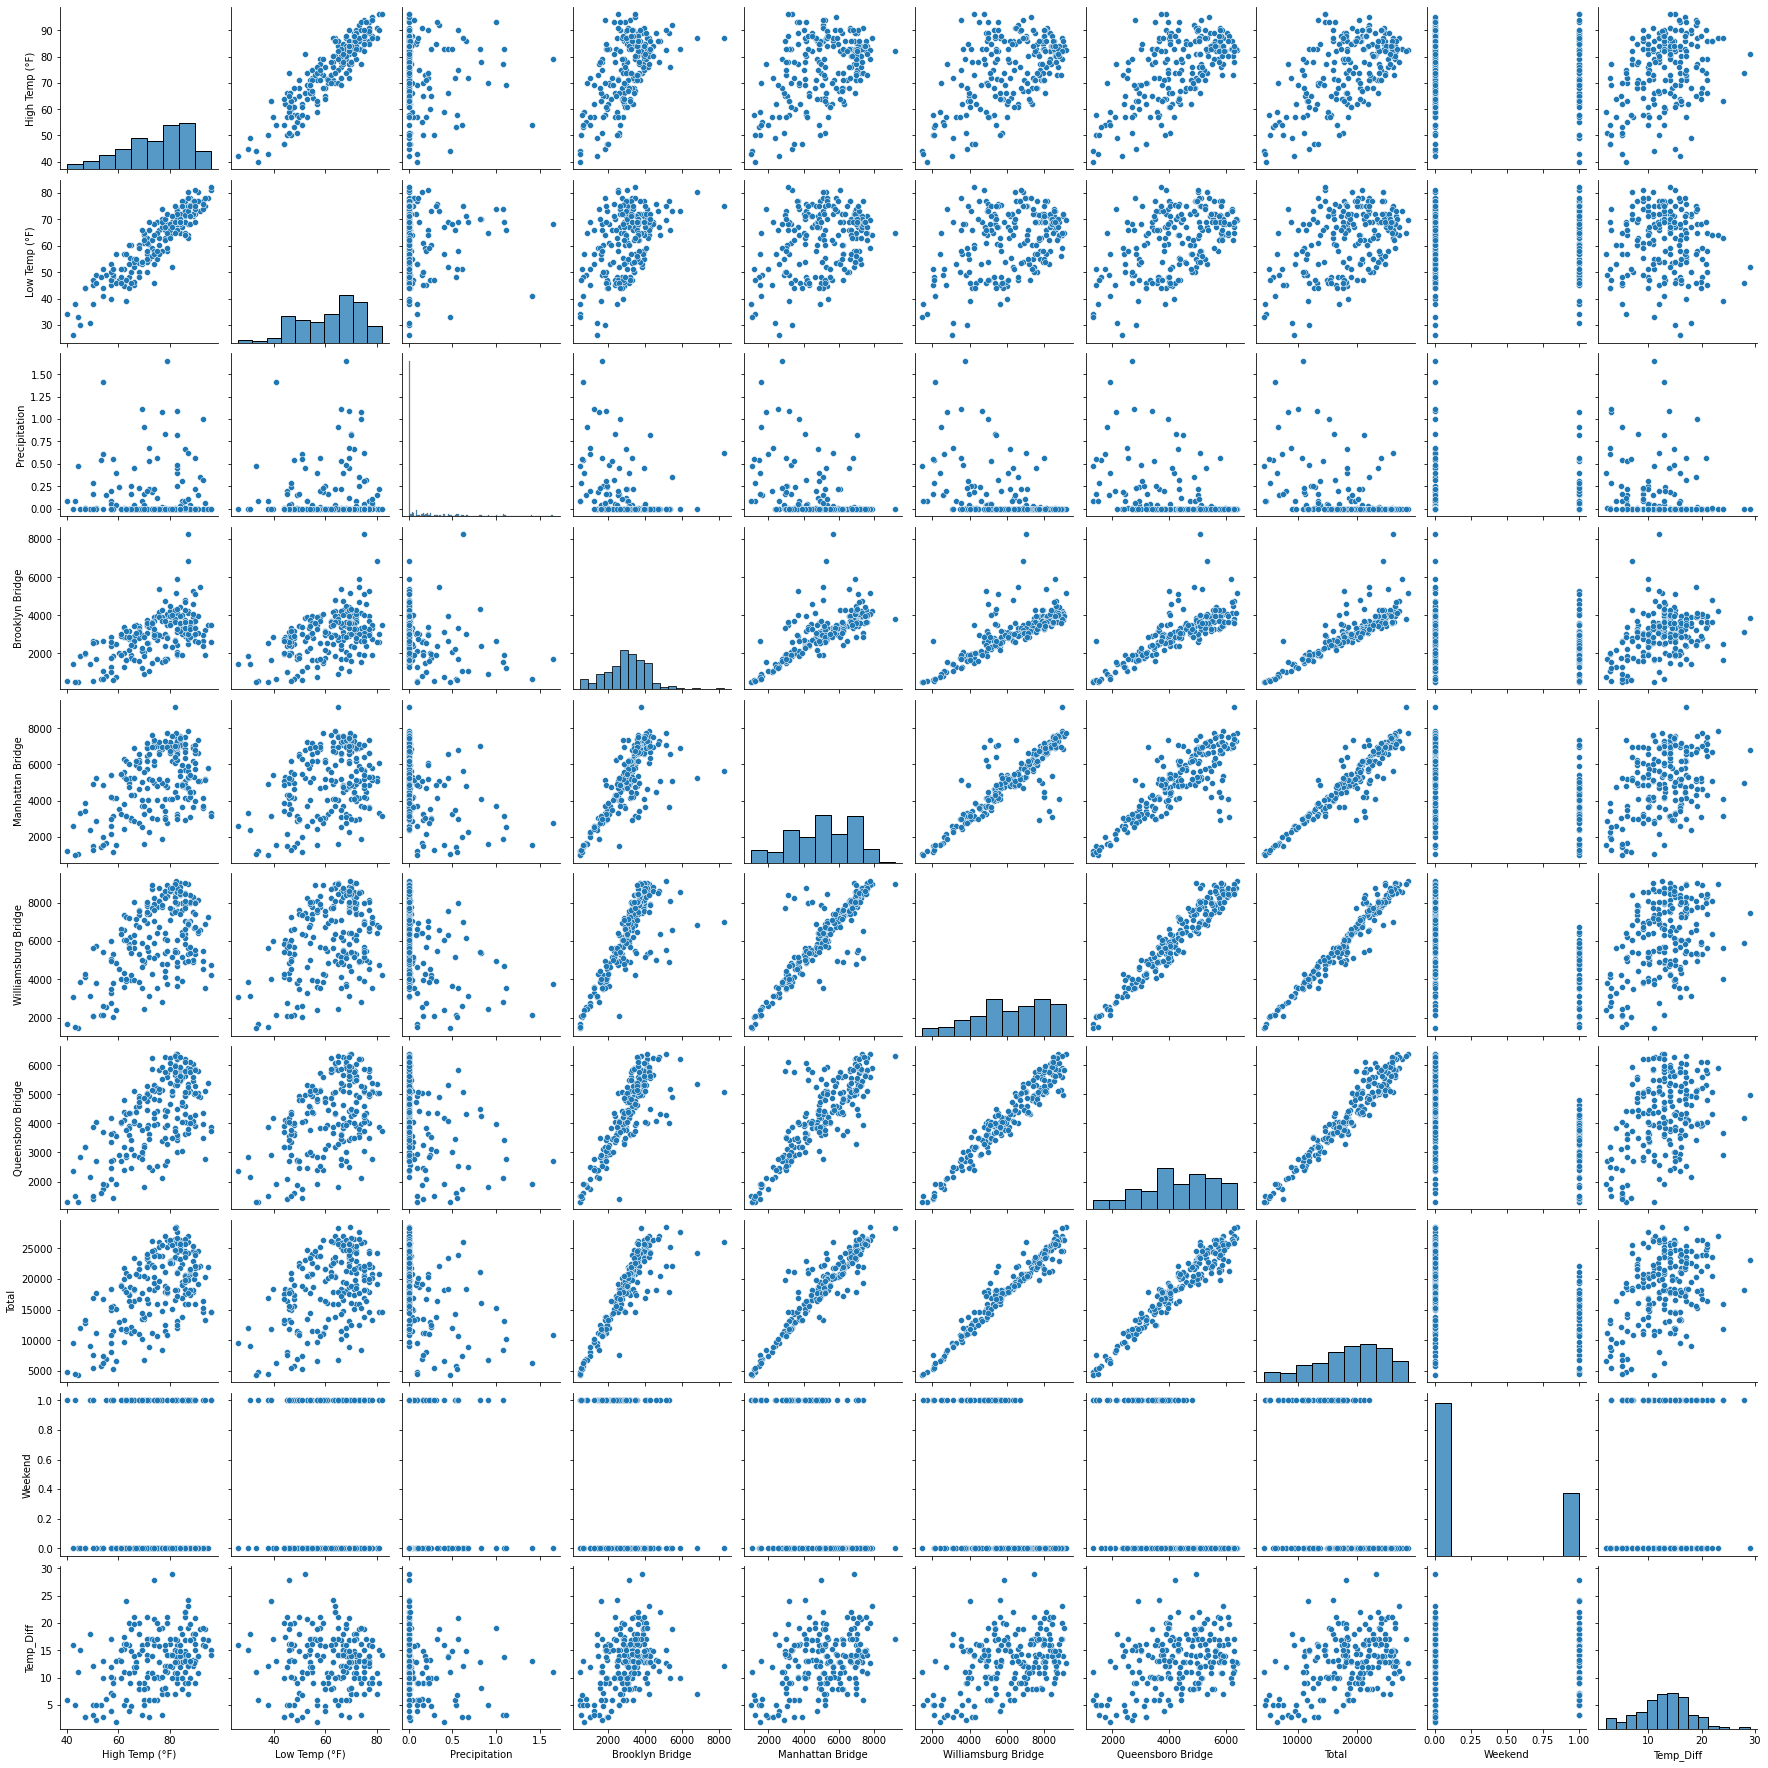

In [11]:
# scatter plots
sns.pairplot(data)

In [12]:
# correlation matrix
data.corr()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff
High Temp (°F),1.000000,0.917376,-0.052069,0.587068,0.468339,0.528813,0.618883,0.574179,-0.038259,0.368121
Low Temp (°F),0.917376,1.000000,0.040390,0.475640,0.334844,0.397539,0.505758,0.442149,-0.038300,-0.032365
Precipitation,-0.052069,0.040390,1.000000,-0.338858,-0.410593,-0.423247,-0.388024,-0.420711,0.016600,-0.225103
Brooklyn Bridge,0.587068,0.475640,-0.338858,1.000000,0.751713,0.792604,0.813207,0.874413,-0.280222,0.363099
Manhattan Bridge,0.468339,0.334844,-0.410593,0.751713,1.000000,0.878377,0.838967,0.935474,-0.416446,0.393855
Williamsburg Bridge,0.528813,0.397539,-0.423247,0.792604,0.878377,1.000000,0.965399,0.975089,-0.527334,0.399259
Queensboro Bridge,0.618883,0.505758,-0.388024,0.813207,0.838967,0.965399,1.000000,0.963180,-0.497630,0.372634
Total,0.574179,0.442149,-0.420711,0.874413,0.935474,0.975089,0.963180,1.000000,-0.469957,0.408967
Weekend,-0.038259,-0.038300,0.016600,-0.280222,-0.416446,-0.527334,-0.497630,-0.469957,1.000000,-0.006604
Temp_Diff,0.368121,-0.032365,-0.225103,0.363099,0.393855,0.399259,0.372634,0.408967,-0.006604,1.000000


***Multivariate regression***

<AxesSubplot:>

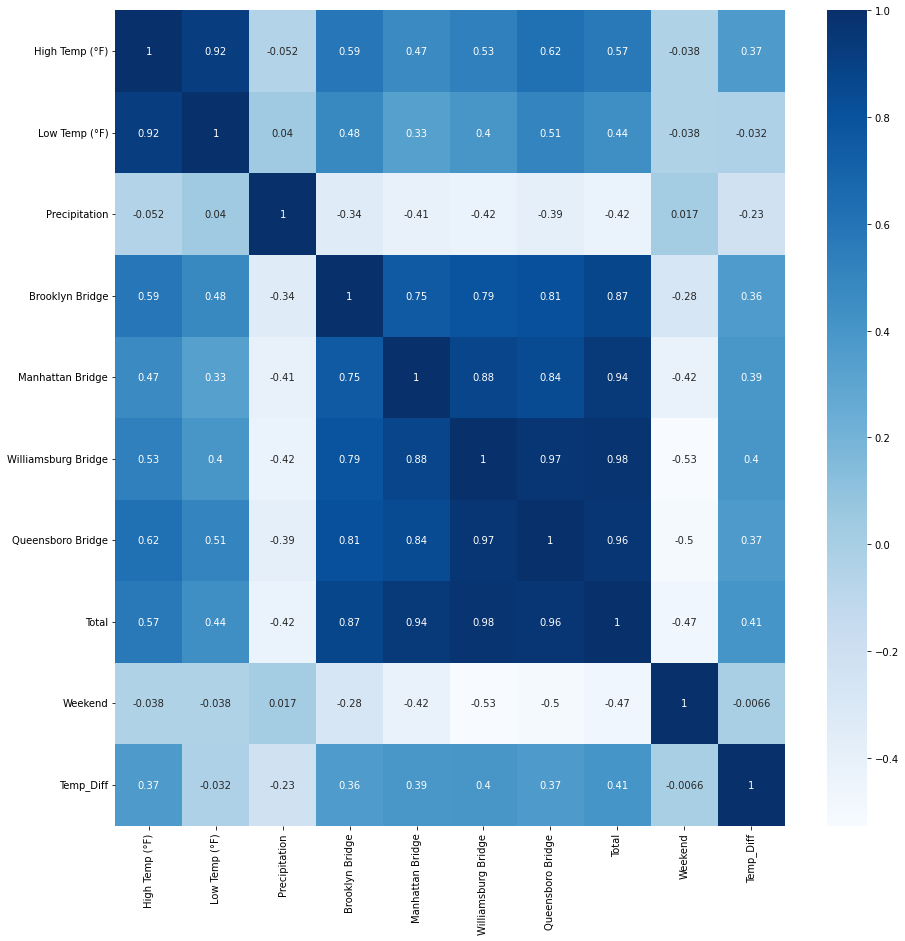

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True, ax=ax)

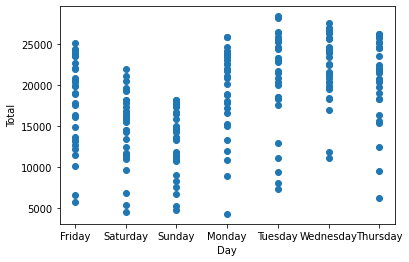

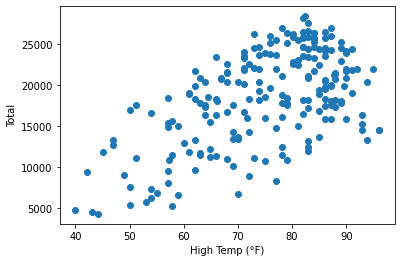

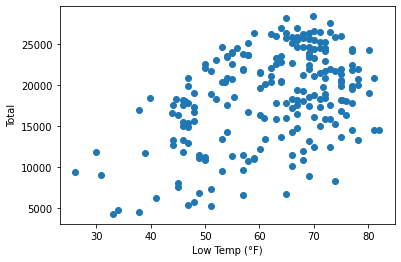

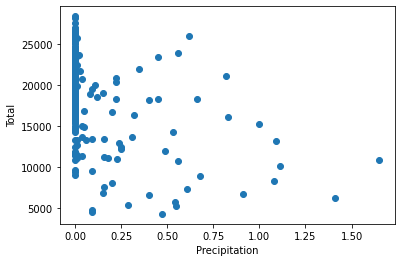

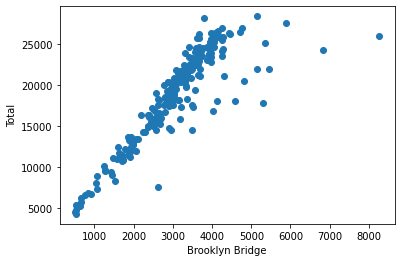

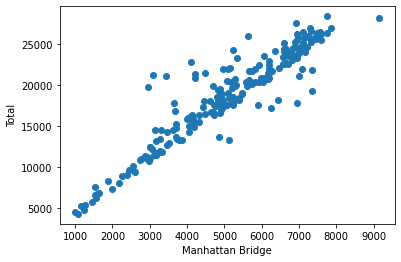

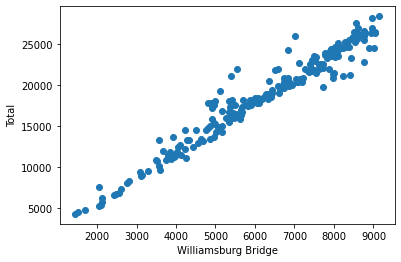

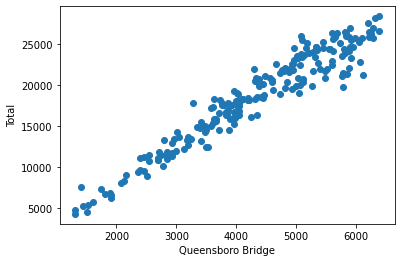

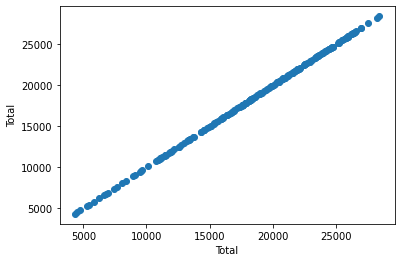

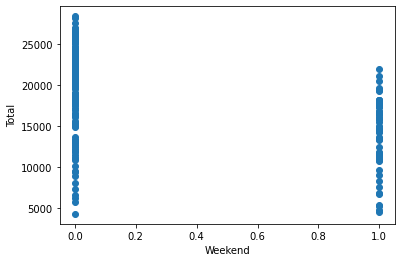

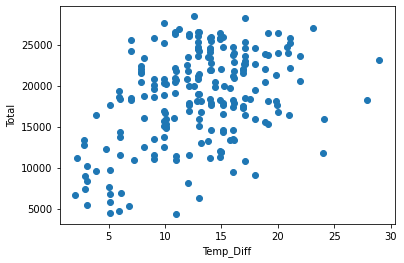

In [14]:
for i, col in enumerate(data.columns):
    plt.scatter(data[col], data['Total'])
    plt.xlabel(str(col))
    plt.ylabel('Total')
    plt.show()

### decide on different sets of variables you want to include
- High Temp
- Low Temp
- Precipitation

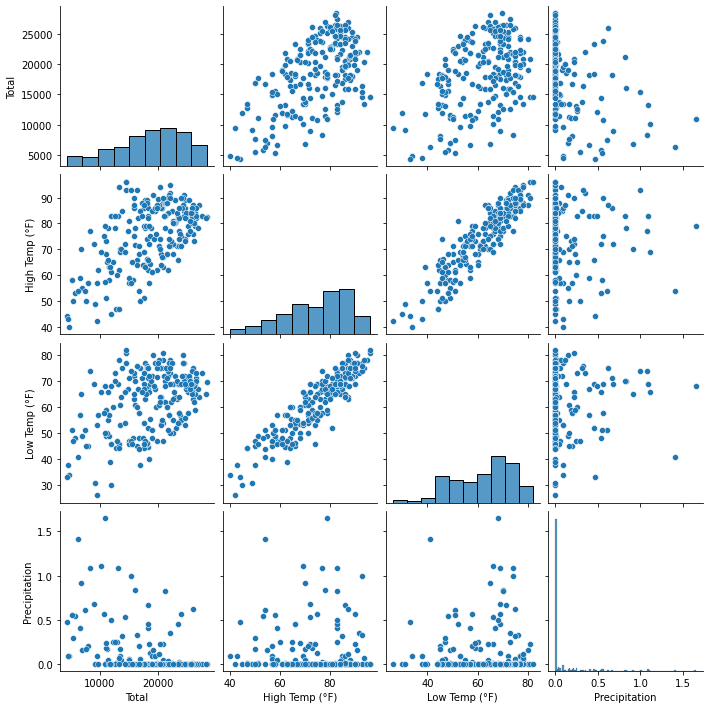

In [15]:
sns.pairplot(data[['Total', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation']])

In [16]:
print(np.corrcoef(data['High Temp (°F)'], data['Total'])[0,1])
print(np.corrcoef(data['Low Temp (°F)'], data['Total'])[0,1])
print(np.corrcoef(data['Precipitation'], data['Total'])[0,1])

0.5741789145258155
0.4421493145412952
-0.4207113087552629


### split the dataset into train and test

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

First of all, lets split the dataset into Train and Test to have some extra data that the model was not trained on. We will use this data to check model perfomance.

In [18]:
X = data[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']]
y = data['Total']

X.shape, len(y)

((214, 3), 214)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, len(y_test), len(y_train)

((171, 3), (43, 3), 43, 171)

###  try out training different models 

(e.g. multivariate linear regression with variables: [High, Low, Precipitation], [Low, Precipitation, Weekend], ..., also decision trees with different depth) 

Lets now train our first candidate model!

In [20]:
data.Total.sum() # it means 3 968 530 bikes crosses over 4 bridges in april to october 2016

3968530.0

In [21]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [22]:
X.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation'], dtype='object')

In [23]:
reg1.coef_  # the change in the independent variable for the unit change in the independent variable.

array([  380.08777818,  -177.04174817, -8681.58725608])

- if High Temp goes higher 1F, then number of bikes in bridges, who cross bridges increases about 380
- if Low Temp goes lower 1F, then number of bikes, who cross bridges decreases about 177
- if outside has more precipitations, then number of bikes, who cross the bridges decrease about 8 682

In [24]:
y_pred_train = reg1.predict(X_train)
y_pred_test = reg1.predict(X_test)

In [25]:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.4679517551970861
0.5750174641749829


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))

3372.749106310453 3659.9654474707686
16038709.048392104 17498379.317228083
4004.835708039982 4183.106419543744


In [28]:
# just checking test and train r2_score difference in percentage
(1-(r2_score(y_train, y_pred_train)/r2_score(y_test, y_pred_test)))*100  

18.619557778390494

- Kui test on  parem, kui treening - underfitting - if test is better than train
- Kui treening on parem kui test - overfitting - if train is better than test

***We have UNDERFITTING data model***

In [29]:
X_1= data[['High Temp (°F)', 'Precipitation', 'Weekend', 'Temp_Diff']]
y_1 = data['Total']

X.shape, len(y)

((214, 3), 214)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=21)
X_train.shape, X_test.shape, len(y_test), len(y_train)

((171, 4), (43, 4), 43, 171)

In [31]:
reg2 = LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

In [32]:
X_1.columns

Index(['High Temp (°F)', 'Precipitation', 'Weekend', 'Temp_Diff'], dtype='object')

In [33]:
reg2.coef_

array([  219.85714603, -7609.69775204, -5544.0891566 ,   187.5538808 ])

- if temp goes higher 1 F, then number of bikes increase 219
- if outside has more rainfall then the number of bikes decreases 7610
- ***How to read the weekend values?***
- if the temperature difference becomes larger by 1F, then number of bikes increases 188

In [34]:
y_pred_train = reg2.predict(X_train)
y_pred_test = reg2.predict(X_test)

In [35]:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.6855619495459817
0.7148237410167402


In [36]:
print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))

2505.612410479927 2292.314680834565
10297248.715771906 7961051.783951978
3208.9326443183418 2821.53358724506


In [37]:
data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff
Date,,,,,,,,,,,
1-Apr,Friday,78.1,66.0,0.01,1704.0,3126.0,4115.0,2552.0,11497.0,0,12.1
2-Apr,Saturday,55.0,48.9,0.15,827.0,1646.0,2565.0,1884.0,6922.0,1,6.1
3-Apr,Sunday,39.9,34.0,0.09,526.0,1232.0,1695.0,1306.0,4759.0,1,5.9
4-Apr,Monday,44.1,33.1,0.47,521.0,1067.0,1440.0,1307.0,4335.0,0,11.0
5-Apr,Tuesday,42.1,26.1,0.00,1416.0,2617.0,3081.0,2357.0,9471.0,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54.0,41.0,1.41,651.0,1558.0,2137.0,1902.0,6248.0,0,13.0
28-Oct,Friday,46.9,44.1,0.00,2021.0,3872.0,4271.0,3202.0,13366.0,0,2.8
29-Oct,Saturday,63.0,39.0,0.00,1639.0,3160.0,4027.0,2920.0,11746.0,1,24.0


In [38]:
# just checking test and train r2_score difference in percentage
(1-(r2_score(y_train, y_pred_train)/r2_score(y_test, y_pred_test)))*100  

4.0935673777618975

***We have UNDERFITTING model*** 
- I think we have to find better model, it means choose better independent values ?

In [39]:
data.describe()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.933645,61.972430,0.109065,3030.700935,5052.233645,6160.873832,4300.724299,18544.532710,0.289720,12.961215
std,12.545418,11.670566,0.259959,1134.044825,1745.485407,1910.643106,1260.985725,5702.083786,0.454696,4.995955
min,39.900000,26.100000,0.000000,504.000000,997.000000,1440.000000,1306.000000,4335.000000,0.000000,2.000000
25%,66.050000,53.225000,0.000000,2387.750000,3713.250000,4884.500000,3495.750000,14825.750000,0.000000,9.900000
50%,78.100000,64.900000,0.000000,3076.500000,5132.000000,6334.500000,4342.500000,19001.500000,0.000000,13.000000
75%,84.900000,71.100000,0.047500,3685.250000,6609.500000,7858.000000,5308.500000,23253.500000,1.000000,16.100000
max,96.100000,82.000000,1.650000,8264.000000,9152.000000,9148.000000,6392.000000,28437.000000,1.000000,29.000000
